# NB Setup

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math


def get_max_freq(scores):
    scores_list = scores.tolist()
    frequencies = {num: scores_list.count(num) for num in set(scores_list)}
    return max(frequencies.values())


def plot_tendencies(scores_data, max_freq, min_num, max_num, samples_count):
    plt.figure(figsize=(12, 5))
    plt.hist(scores, bins=np.arange(min_num, max_num + 1) - 0.5, align="mid", rwidth=0.8, edgecolor="black", color="lightseagreen")
    plt.xlabel("$x$")
    plt.ylabel("Frequencies")
    plt.xticks(np.arange(1, max_num))
    plt.yticks(np.arange(1, max_freq + 5))
    plt.grid(axis="y", alpha=0.7, ls="--")

    # sample info
    plt.figtext(0.15, 0.9, f"min: {min_num}\nmax: {max_num - 1}\nsamples: {samples_count}", fontsize=12)

    # mean and median as vertical lines, mode as frequency max unit
    plt.axvline(x=mean, color="darkred", ls="-", lw=2, label=f"Mean: {mean:.2f}")
    plt.axvline(x=median, color="darkblue", ls="-.", lw=2, label=f"Median: {median}")
    plt.axhline(y=max_freq, color="darkgreen", linestyle=":", lw=2, label=f"Highest Frequency: {max_freq}")

    plt.legend(loc="upper right")
    plt.show()


def plot_dispersion_kde(x, y):
    sns.histplot(x, bins=10, kde=True, color="blue", label=f"x (Var={np.std(x):.2f})", alpha=0.5)
    sns.histplot(y, bins=10, kde=True, color="red", label=f"y (Var={np.std(y):.2f})", alpha=0.5)

    plt.title("Histogram with Density Curve (KDE)")
    plt.xlabel("Values")
    plt.ylabel("Frequency/Density")
    plt.legend()
    plt.show()

<br><hr><hr><br>

# Population Data vs Sample Data

* Population Data:
    * Represents the *entire group* of individuals or observations relevant to a study
    * It includes *every single member* of the group
    * Often difficult or impossible to collect due to its large data size

* Sample Data:
    * Represents a subset of the population, selected to make inferences about the whole population
    * Used when collecting data from the entire population is impractical
    * Requires proper sampling techniques to ensure accuracy and reduce bias

* Example:
    * If an employer surveys an entire department about how they travel to work, the data would represent the *population data*. However, this same data would be the *sample data* of the employees in the whole company

In [6]:
np.random.seed(13)

scores = np.random.randint(1, 10, 10)
df = pd.DataFrame({"scores": scores})
print(scores)
print(len(scores))

[3 1 1 7 3 5 4 5 3 7]
10


<br><hr><hr><br>

# Central Tendencies
* A measure that describes the center or typical value of a dataset
* They help summarize a large amount of data with a single value that represents the entire distribution
* Use Cases:
    * *Summarizing data*
        * Instead of listing all the data points, using one central value can summarize a dataset
    * *Understanding data distribution*
        * Knowing the mean or median gives an idea of knowing where the bulk of the data lies
    * *Comparing datasets*
        * Central Tendencies allow for easy comparison of different datasets. Example: comparing the average income across 2 cities or the median test score of 2 groups, can help with making decisions or observations about their relative central points
    * *Basis for further analysis*
        * Understanding the central tendency can guid the choice of other statistical methods like variance, standard deviation and skewness

* Central tendencies measurements:
<table>
  <tr>
    <th>Name</th>
    <th>Best for</th>
    <th>Use case</th>
  </tr>
  <tr>
    <td>Mean</td>
    <td>Symmetric data, no extreme outliers</td>
    <td>Average salary of employees</td>
  </tr>
  <tr>
    <td>Median</td>
    <td>Skewed data, presence of outliers</td>
    <td>Median house price in a city</td>
  </tr>
  <tr>
    <td>Mode</td>
    <td>Categorical or multimodal data</td>
    <td>Most frequent color in a dataset of cars</td>
  </tr>
</table>


<br><hr><br>

## Mean

* The mean is the *sum of all values divided by the total number of values*
* Represents the center of a dataset
* Noted as $\quad \mu \quad$ for population data and as $\quad \bar{x} \quad$ for sample data
* Use case: common in statistics when all values contribute equally, like calculating average temperature or average income

<br>
$$\text {Population Data formula:}$$

$$\mu = \frac{1}{N} \sum\limits_{i=0}^{N-1} x_i$$

<br>

$$\text {Sample Data formula:}$$

$$\bar{x} = \frac{1}{n-1} \sum\limits_{i=0}^{n-1} x_i$$

In [11]:
manual_mean_example = sum(scores) / len(scores)
np_mean_example = np.mean(scores)
scipy_mean_example = stats.tmean(scores)
pd_mean_example = df["scores"].mean(axis=0)

print(f"scores: {scores}")
print(f"manual example mean: {manual_mean_example}")
print(f"numpy example mean: {np_mean_example}")
print(f"scipy example mean: {scipy_mean_example}")
print(f"pandas example mean: {pd_mean_example}")

scores: [3 1 1 7 3 5 4 5 3 7]
manual example mean: 3.9
numpy example mean: 3.9
scipy example mean: 3.9
pandas example mean: 3.9


<br><hr><br>

## Median (middle value)
 * The median is the *middle value* when the numbers are arranged in order
    * If the dataset has an odd number of elements, the median is the *middle number*
    * If the dataset has an even number of elements, the median is the *average of the two middle numbers*
    * Use case: useful when data has outliers that might distort the mean, like house prices or salaries

<br>
$$\text{Assuming index starts from 0:}$$

$$
\tilde{X} =
\begin{cases}
X_{\left\lfloor \frac{N}{2} \right\rfloor}, & \text{if } N \text{ is odd} \\[10pt]
\frac{X_{\left(\frac{N}{2} - 1\right)} + X_{\left(\frac{N}{2}\right)}}{2}, & \text{if } N \text{ is even}
\end{cases}
$$

In [14]:
sorted_scores, scores_length = sorted(scores), len(scores)


def manual_example():
    if scores_length % 2 == 0:
        middle = scores_length // 2
        median = (sorted_scores[middle - 1] + sorted_scores[middle]) / 2
    else:
        median = sorted_scores[scores_length // 2]
    return median


np_example = np.median(sorted_scores)
pd_example = df["scores"].median(axis=0)

print(f"scores: {scores}")
print(f"manual example median: {manual_example()}")
print(f"numpy example median: {np_example}")
print(f"pandas example median: {pd_example}")

scores: [3 1 1 7 3 5 4 5 3 7]
manual example median: 3.5
numpy example median: 3.5
pandas example median: 3.5


<br><hr><br>

## Mode (most frequent value)

* The mode is the most *frequently ocurring number* in a dataset
* When the mode finds 2 or more numbers with the same highest frequency in a dataset, it identifies the dataset as *multimodal.* In this case, *all* the values that appear with the heighest frequency are considered modes
    * Unimodal: `[1, 2, 2, 3, 4]`
        * Mode = `2`, since it appears the most frequently
    * Bimodal: `[1, 2, 2, 3, 3, 4]`
        * Mode = `2` and `3`, sice they both appear twice
    * Multimodal: `[1, 1, 2, 2, 3, 3, 4]`
        * Mode = `1`, `2`, and `3`, since all of them appear twice
    * No Mode: `[1, 2, 3, 4]`
        * No Mode, since all values appear once

In [17]:
scores_list = scores.tolist()
frequencies = {num: scores_list.count(num) for num in set(scores_list)}
modes = [num for num, freq in frequencies.items() if freq == max(frequencies.values())]

print(f"scores: {scores.tolist()}")
print(f"frequencies: {frequencies}")
print(f"max frequency: {max(frequencies.values())}")
print(f"modes: {modes}")

scores: [3, 1, 1, 7, 3, 5, 4, 5, 3, 7]
frequencies: {1: 2, 3: 3, 4: 1, 5: 2, 7: 2}
max frequency: 3
modes: [3]


<br><hr><br>

## Visual examples

[ 6 10  5  3  1  4  6  4  7  6  2  3  9  9  7  3  5  6  8  4  6  9  4  9
  6  2  9  2  8  8]


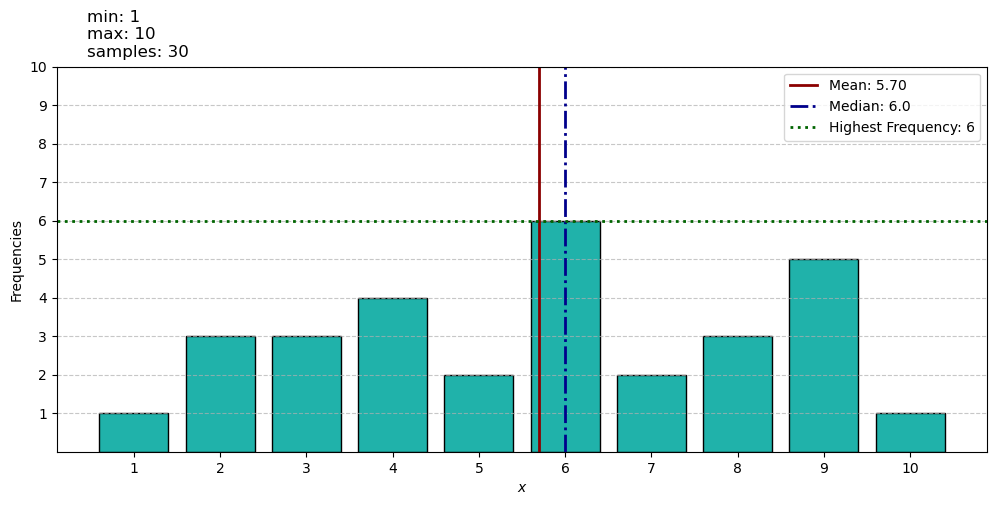

In [20]:
min_num = 1
max_num = 11
samples_count = 30

scores = np.random.randint(min_num, max_num, samples_count)
mean = np.mean(scores)
median = np.median(scores)

print(scores)
plot_tendencies(scores_data=scores, max_freq=get_max_freq(scores),
                min_num=min_num, max_num=max_num, samples_count=samples_count)

[ 7 20 20 16  7 20 17 11 14  5 20  6  1 16 14 10  4  3 18  9  6 14 16  6
 18  2 17  8 16  5  4  2  4 19 18  4 17  5 12  5  7 14 20 12  4]


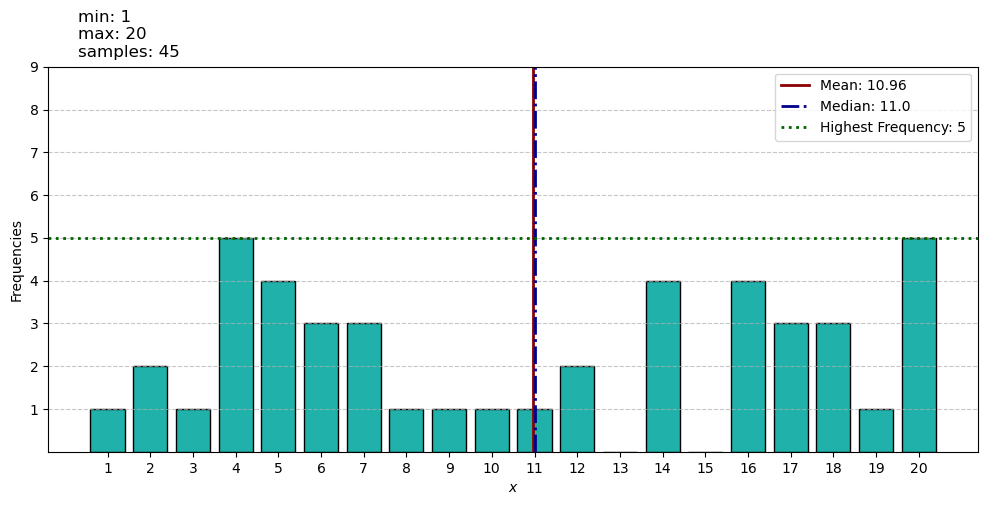

In [21]:
min_num = 1
max_num = 21
samples_count = 45

scores = np.random.randint(min_num, max_num, samples_count)
mean = np.mean(scores)
median = np.median(scores)

print(scores)
plot_tendencies(scores_data=scores, max_freq=get_max_freq(scores),
                min_num=min_num, max_num=max_num, samples_count=samples_count)

[26 17  5 30 26 10 19 17  3 19 27 10 11 29  8 25 23 11 18 29 24 10 25  9
 10 28 16 13 16 17  4  5 24 25 30 18 14 14 27 23  9 28 21  2 17 17  8 15
 24 26  7 27 14 18 16 19  9  7  7 22  3  2 27  6  7  9 14 15 21  6 13  7
 13 23 28  9 18 20 28  1  9 19 20 27 20 13 10 17 18 29 12  9 17  6  1 22
  5 29  9 16 29 16 29  1 14  7 18 11 26 16 15 30 28 28 21 14 18  8 16 16
 12  2 25 10 25 13  9 18  7 11 25 23 23 25 28  7 28 30 25  1  3 15 25  8
 22 29 21 22  3 16 28 16  2 15  2 19 10 29 11 23 22  5  7 11  5 16 11  9
  1 21 16 30 16 24  8  1 14 16 29 11 18  3 14  5 18 23 13 15  2  6 15 19
 11 27 27 26 24 11  2  8]


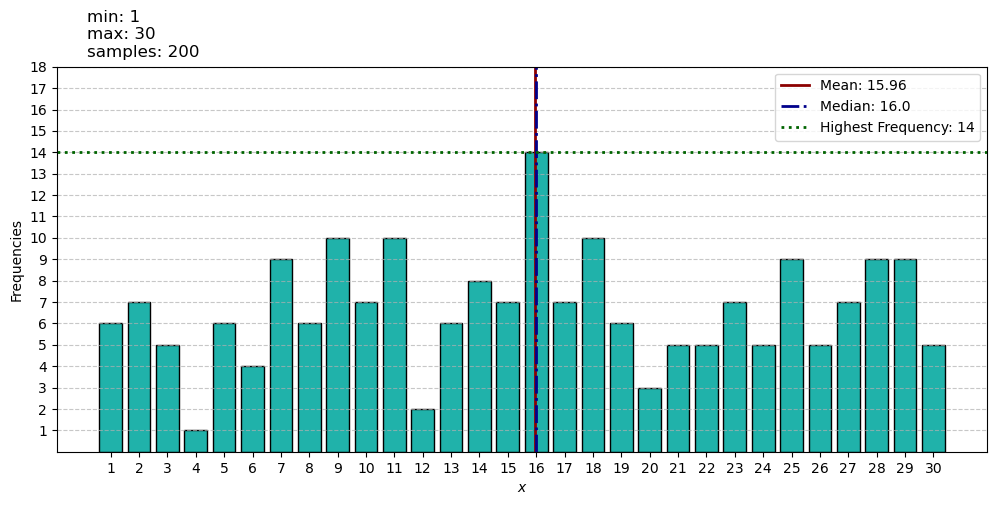

In [22]:
min_num = 1
max_num = 31
samples_count = 200

scores = np.random.randint(min_num, max_num, samples_count)
mean = np.mean(scores)
median = np.median(scores)

print(scores)
plot_tendencies(scores_data=scores, max_freq=get_max_freq(scores),
                min_num=min_num, max_num=max_num, samples_count=samples_count)

# Dispersion

* Refers to the extent to whcih data points in a dataset spread out or vary from a central value, such as mean or median. It provides insight into the *variability* or *spread* of the data
    * A higher dispersion indicates that the data points are spread out over a wider range
    * A lower dispersion suggests that the data points are clustered close to the central value
* Density Curve (KDE):
    * Helps showing the probability density, by revealing how spread out the data points are


## Variance

* It's a measure that indicates how much data scatter around the mean value
* Noted as $\quad \sigma^2 \quad$ for population data and as $\quad s^2 \quad$ for sample data

<br>

$$\text {Formula For Population Data:}$$
<br>
$$\sigma^2 = \frac{1}{N} \sum\limits_{i=0}^{N-1} (x_i - \mu)^2$$

<br>

$$\text {Formula For Sample Data:}$$
<br>
$$s^2 = \frac{1}{n-1} \sum\limits_{i=0}^{n-1} (x_i - \bar{x})^2$$

using manual calculation
x array = [17.  18.  19.   2.5]
y array = [20 20 20 20]
variance of x = 45.546875
variance of y = 0.0

using numpy
x array = [17.  18.  19.   2.5]
y array = [20 20 20 20]
variance of x = 45.546875
variance of y = 0.0



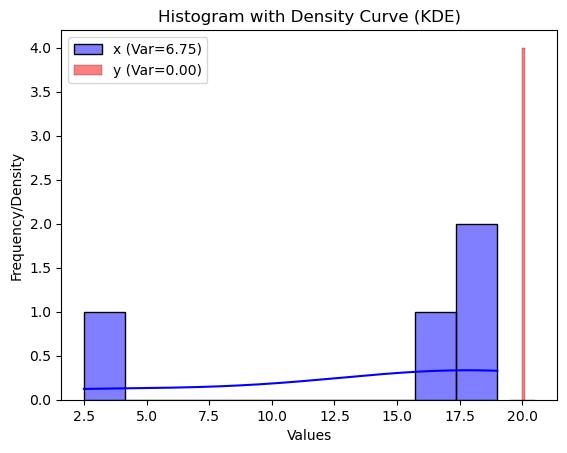

In [25]:
x = np.array([17, 18, 19, 2.5])
y = np.array([20, 20, 20, 20])


def calculate_variance(arr):
    mean = sum(arr) / len(arr)
    var = sum([(i - mean) ** 2 for i in arr]) / len(arr)
    return var


print("using manual calculation")
print(f"x array = {x}\ny array = {y}")
print(f"variance of x = {calculate_variance(x)}\nvariance of y = {calculate_variance(y)}")

print("\nusing numpy")
print(f"x array = {x}\ny array = {y}")
print(f"variance of x = {np.var(x)}\nvariance of y = {np.var(y)}\n")

# the blue KDE curve for x will be wider (higher variance)
# the red KDE curve for y will be a single spike (variance = 0)
plot_dispersion_kde(x, y)

## Standard Deviation

* Represents the average distance from the mean
* Noted as $\quad \sigma \quad$  for population data and as $\quad s \quad$  for sample data


<br>

$$\text {Formula For Population Data:}$$

$$\sigma \quad = \quad \sqrt{\sigma^2} \quad = \quad \sqrt{\frac{1}{N} \sum\limits_{i=0}^{N-1} (x_i - \mu)^2}$$

<br>

$$\text {Formula For Sample Data:}$$

$$s \quad = \quad \sqrt{s^2} \quad = \quad \sqrt{\frac{1}{n-1} \sum\limits_{i=0}^{n-1} (x_i - \bar{x})^2}$$


using manual calculation
x array = [17.  18.  19.   2.5]
y array = [20 20 20 20]
standard deviation of x = 6.748842493346544
standard deviation of y = 0.0

using numpy
x array = [17.  18.  19.   2.5]
y array = [20 20 20 20]
standard deviation of x = 6.748842493346544
standard deviation of y = 0.0



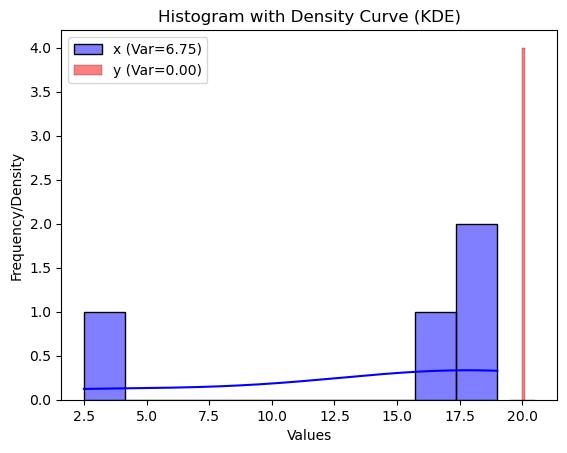

In [27]:
x = np.array([17, 18, 19, 2.5])
y = np.array([20, 20, 20, 20])


def calculate_std(arr):
    mean = sum(arr) / len(arr)
    var = sum([(i - mean) ** 2 for i in arr]) / len(arr)
    return math.sqrt(var)


print("using manual calculation")
print(f"x array = {x}\ny array = {y}")
print(f"standard deviation of x = {calculate_std(x)}\nstandard deviation of y = {calculate_std(y)}")

print("\nusing numpy")
print(f"x array = {x}\ny array = {y}")
print(f"standard deviation of x = {np.std(x)}\nstandard deviation of y = {np.std(y)}\n")

# the blue KDE curve for x will be wider (higher std)
# the red KDE curve for y will be a single spike (std = 0)
plot_dispersion_kde(x, y)